In [31]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib
import pylab
from matplotlib import transforms, pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
#
# %matplotlib inline

In [2]:
# Построение плотности распределения
def draw_kde(col1, col2, col3, df1, df2, label1, label2):
    #fig, (ax11, ax12, ax21, ax22) = plt.subplots(
    #    ncols=4, figsize=(20, 15))
    # первый первый график
    pylab.figure(figsize=(20, 15))
    pylab.subplot(2, 2, 1)
    pylab.title("'"+col2+"' "+label1)
    pylab.plot(df1[col1], df1[col2])
    # первый второй график
    pylab.subplot(2, 2, 2)
    pylab.title("'"+col2+"' "+label2)
    pylab.plot(df2[col1], df2[col2])
    # второй первый график
    pylab.subplot(2, 2, 3)
    pylab.title("'"+col3+"' "+label1)
    pylab.plot(df1[col1], df1[col3])
    # второй второй график
    pylab.subplot(2, 2, 4)
    pylab.title("'"+col3+"' "+label2)
    pylab.plot(df2[col1], df2[col3])
    
    pylab.show()

# Выбрать один или несколько наборов данных (датасетов) для решения следующих задач.

In [3]:
data = pd.read_csv('./books.csv', sep=',', encoding="utf-8")
data.head(1)

,BookID,Title,Authors,Average_rating,ISBN,ISBN13,Language_code,Num_pages,Ratings_count,Text_reviews_count,Publication_date,Publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [4]:
data = data.reset_index(drop=True)
enc = OrdinalEncoder(categories='auto', dtype=int)
data[["BookID"]] = enc.fit_transform(data[["BookID"]])
row_date_data = data["Publication_date"]
date_data = row_date_data.str.split('/',expand=True)
date_data.columns = ["Publication_month", "Publication_day", "Publication_year"]
date_data = date_data[["Publication_month", "Publication_year"]]
date_data.head(1)
data["Publication_month"] = pd.to_numeric(date_data["Publication_month"])
data["Publication_year"] = pd.to_numeric(date_data["Publication_year"])
data = data.drop(columns="ISBN")
data = data.drop(columns="ISBN13") # удалю признаки номера и категориальные, т.к. далее в обработке они не участвуют
data = data.drop(columns="Title")
data = data.drop(columns="Authors")
data = data.drop(columns="Language_code")
data = data.drop(columns="Publication_date")
data = data.drop(columns="Publisher")
data.head(1)

,BookID,Average_rating,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,0,4.57,652,2095690,27591,9,2006


In [5]:
# DataFrame не содержащий целевой признак Average_rating
X_ALL = data.drop(['Average_rating'], axis=1)

In [6]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [7]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Average_rating'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((8898, 6), (2225, 6))

# масштабирование признаков (не менее чем тремя способами)

## 1) Масштабирование данных на основе Z-оценки
### x′=(x−μ(x))/σ(x)
### где x - признак, μ(x)=mean(x) - среднее значение, σ(x)=std(x) - среднеквадратичное отклонение.

In [8]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled = arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,-1.731895,1.308751,18.469833,10.498316,0.7183,0.707055


In [9]:
X_ALL.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,0,652,2095690,27591,9,2006


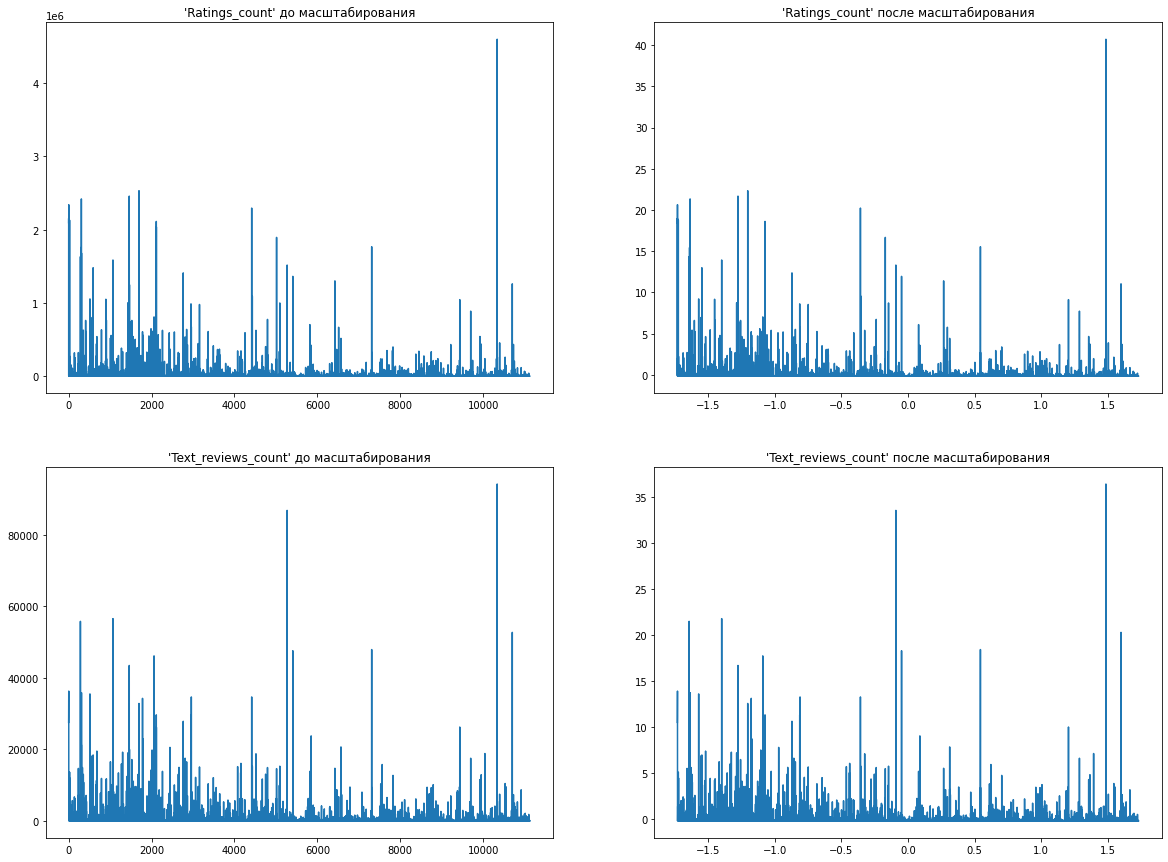

In [10]:
draw_kde('BookID', 'Ratings_count', 'Text_reviews_count', data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [13]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
data_cs12_scaled_train_temp = cs12.fit_transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)
data_cs12_scaled_train.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,-1.706944,0.090988,-0.151827,-0.196983,1.00754,-0.743376


In [14]:
X_train.head(1)

,BookID,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
106,106,360,1035,23,10,1994


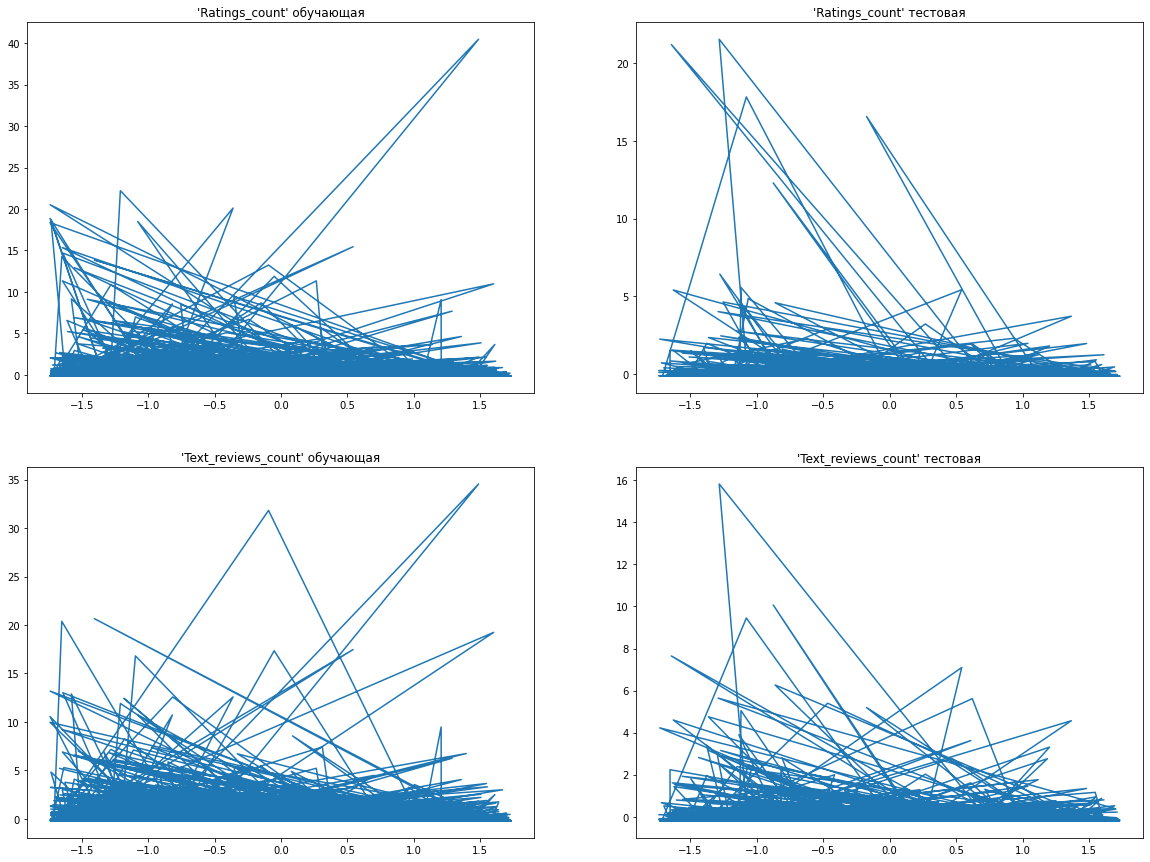

In [15]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde('BookID', 'Ratings_count', 'Text_reviews_count', data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

## 2) MinMax-масштабирование
### X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
### X_scaled = X_std * (max - min) + min

In [26]:
sc2 = MinMaxScaler()
sc2_data = sc2.fit_transform(data[['Ratings_count']])

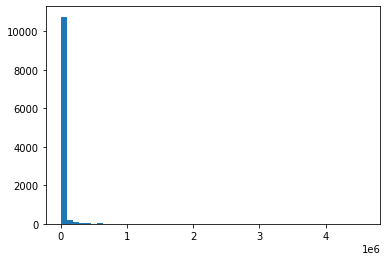

In [27]:
plt.hist(data['Ratings_count'], 50)
plt.show()

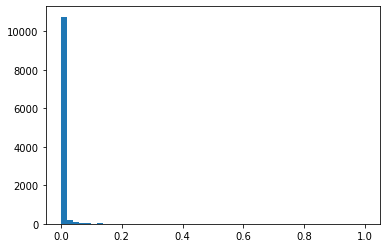

In [28]:
plt.hist(sc2_data, 50)
plt.show()

## 3) Нормализация данных
### Нормировка данных:
### l1 (сумма по каждой строке = 1)
### l2 (дисперсия 1 = 0, мат.ож = 0 - по-умолчанию)

In [33]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Ratings_count']])

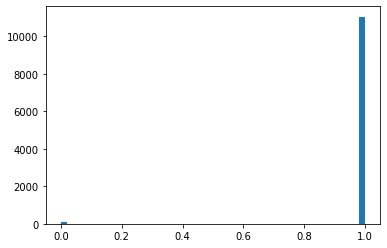

In [34]:
plt.hist(sc3_data, 50)
plt.show()